# Form factor 2D functions with resolution and wedge cut

In [1]:
#include "FormFactor_resolution_add_wedge_2D.h"
#include "FormFactor_t_2D.h"

### These are the parameters for all functions below

In [2]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double ty_min = 0, ty_max = 0.25, tx_prime_min = 0, tx_prime_max = 0.25, bins = 1000; 
double x_min = 0, x_max = 15, y_min = 0, y_max = 15;
double phi_min = 0, phi_max = pi/9, sigma = 0.1;
double tx_min = 0, tx_max = 0.25;

// Initialize constructors
FormFactor_resolution_add_wedge_2D ff_wResCut(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,phi_min,phi_max,sigma,x_min,x_max,y_min,y_max);
FormFactor_t_2D ff_2d(A,Vo,R,a0,tx_min,tx_max,ty_min,ty_max,bins,x_min,x_max,y_min,y_max);

### Compare true form factor with smeared form factor TF2

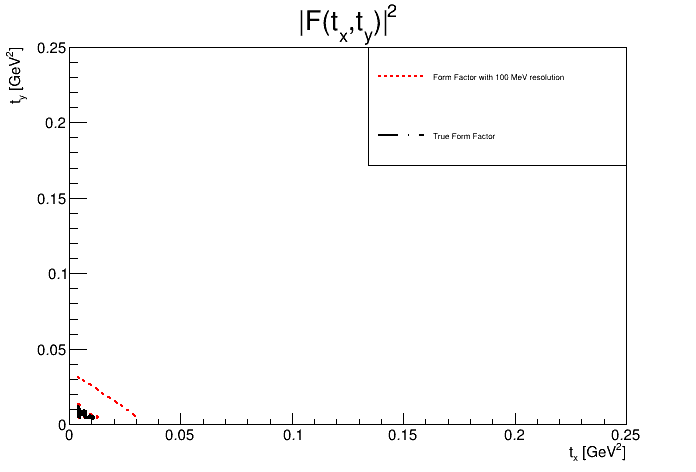

In [4]:
TF2 *ff_cutwRes_fun = ff_wResCut.getWedgeRes_fun_2D();
    double cutFFIntegral = ff_cutwRes_fun->Integral(ff_cutwRes_fun->GetXmin(), ff_cutwRes_fun->GetXmax());
    TF2 *ff_cutwRes = new TF2("", [ff_cutwRes_fun, cutFFIntegral](double *x, double *par) 
    {
        return ff_cutwRes_fun->Eval(x[0], x[1]) / cutFFIntegral;
    }, ff_cutwRes_fun->GetXmin(), ff_cutwRes_fun->GetXmax(), ff_cutwRes_fun->GetYmin(), ff_cutwRes_fun->GetYmax(), 0);
    ff_cutwRes->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_cutwRes->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_cutwRes->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_cutwRes->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_cutwRes->SetLineColor(kRed);
    ff_cutwRes->SetLineStyle(2);
    ff_cutwRes->Draw();
    
TF2 *trueFF_fun = ff_2d.getFormFactort2_2D();
    double trueFFIntegral = trueFF_fun->Integral(trueFF_fun->GetXmin(), trueFF_fun->GetXmax());
    TF2 *trueFF = new TF2("", [trueFF_fun, trueFFIntegral](double *x, double *par) 
    {
        return trueFF_fun->Eval(x[0], x[1]) / trueFFIntegral;
    }, trueFF_fun->GetXmin(), trueFF_fun->GetXmax(), trueFF_fun->GetYmin(), trueFF_fun->GetYmax(), 0);
    trueFF->SetLineColor(kBlack);
    trueFF->SetLineStyle(10);
    trueFF->Draw("same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(ff_cutwRes,"Form Factor with 100 MeV resolution","l");
    legend->AddEntry(trueFF,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(0);
c1->Draw();

### Compare true form factor with smeared form factor histogram

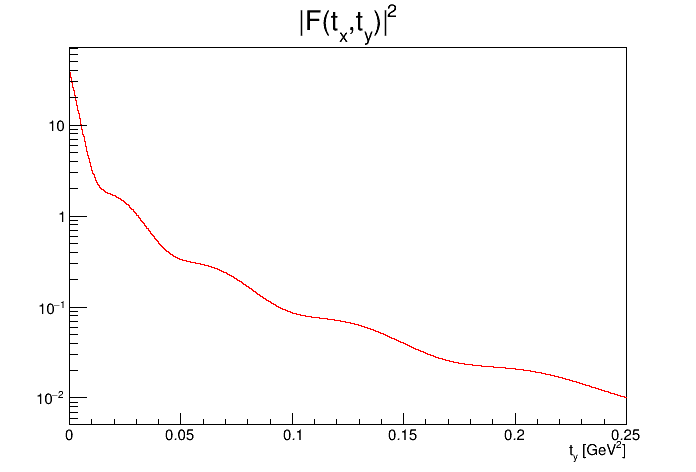

In [7]:
TH2D *ff_cutwRes_hist = ff_wResCut.getWedgeRes_hist_2D();
    ff_cutwRes_hist->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_cutwRes_hist->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_cutwRes_hist->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_cutwRes_hist->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_cutwRes_hist->SetLineColor(kRed);
    ff_cutwRes_hist->SetLineStyle(2);
    ff_cutwRes_hist->ProjectionY()->Draw();

gStyle->SetOptStat(0);
gPad->SetLogy(1);
c1->Draw();

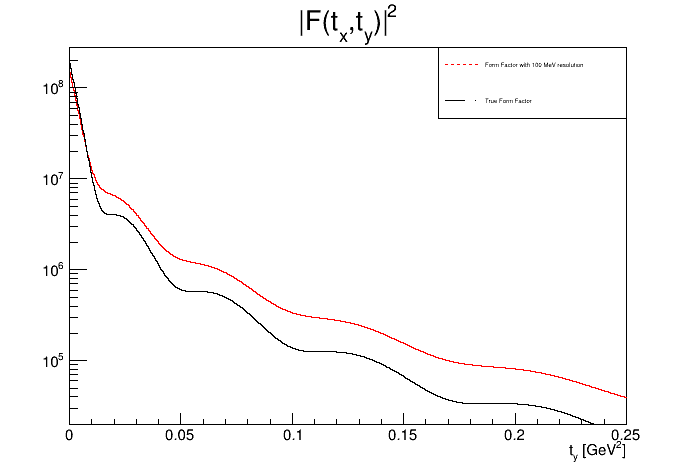

In [9]:
TH2D *ff_cutwRes_hist2 = ff_wResCut.getWedgeRes_hist_2D();
    ff_cutwRes_hist2->Scale(197./ff_cutwRes_hist2->Integral(), "width");
    ff_cutwRes_hist2->SetTitle("|F(t_{x},t_{y})|^{2} y-Projection");
    ff_cutwRes_hist2->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_cutwRes_hist2->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_cutwRes_hist2->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_cutwRes_hist2->SetLineColor(kRed);
    ff_cutwRes_hist2->SetLineStyle(2);
    ff_cutwRes_hist2->ProjectionY()->Draw();
    
TH2D *trueFF_hist = ff_2d.getFormFactort_hist();
    trueFF_hist->Scale(197./trueFF_hist->Integral(), "width");
    trueFF_hist->SetLineColor(kBlack);
    trueFF_hist->SetLineStyle(10);
    trueFF_hist->ProjectionY()->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(ff_cutwRes_hist2,"Form Factor with 100 MeV resolution","l");
    legend->AddEntry(trueFF_hist,"True Form Factor","l");
    legend->Draw();

gStyle->SetOptStat(0);
gPad->SetLogy(1);
c1->Draw();